In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [67]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/drug200.csv")

In [68]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [70]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [71]:
df.duplicated().sum()

np.int64(0)

In [72]:
df.Sex.value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_24008\530956418.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(drug_val, palette='viridis')


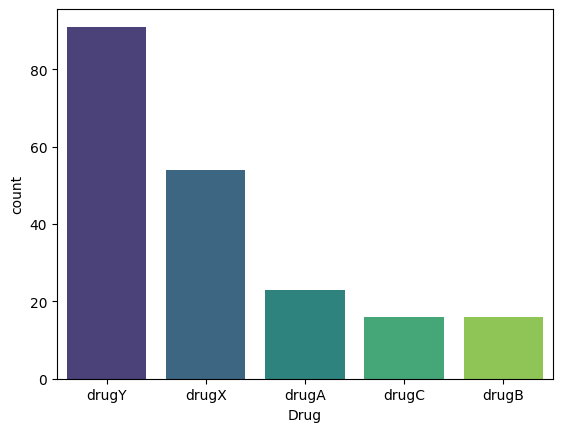

In [73]:
drug_val = df.Drug.value_counts()
sns.barplot(drug_val, palette='viridis')
plt.show()

In [74]:
encoder = OrdinalEncoder()
for col in df.columns:
	df[col] = encoder.fit_transform(df[[col]])

In [75]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,8.0,0.0,0.0,0.0,167.0,4.0
1,30.0,1.0,1.0,0.0,89.0,2.0
2,30.0,1.0,1.0,0.0,43.0,2.0
3,12.0,0.0,2.0,0.0,10.0,3.0
4,44.0,0.0,1.0,0.0,133.0,4.0


In [76]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
gini_model = DecisionTreeClassifier(criterion='gini')
gini_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [79]:
y_pred_gini = gini_model.predict(X_test)

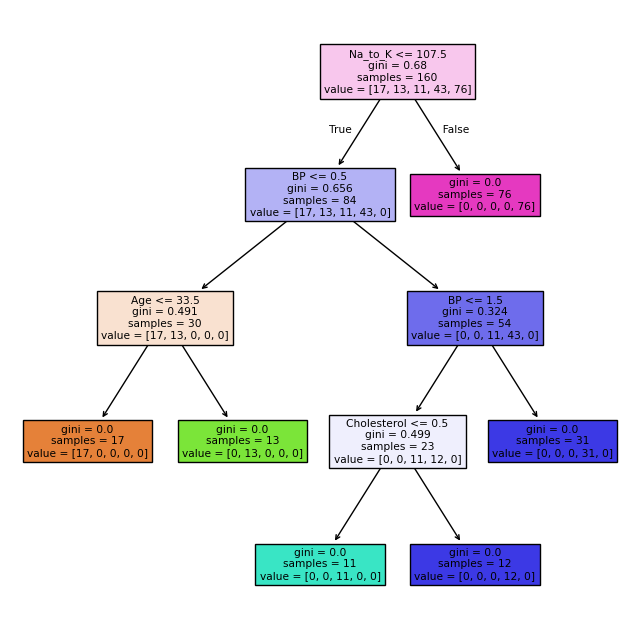

In [80]:
plt.figure(figsize=(8, 8))
tree.plot_tree(gini_model, feature_names=X.columns, filled=True)
plt.show()

In [81]:
print("Accuracy score : ", accuracy_score(y_pred_gini, y_test))
print("Classification report : \n", classification_report(y_pred_gini, y_test))

Accuracy score :  1.0
Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00        11
         4.0       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Model is overfitting

entropy

In [82]:
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
entropy_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


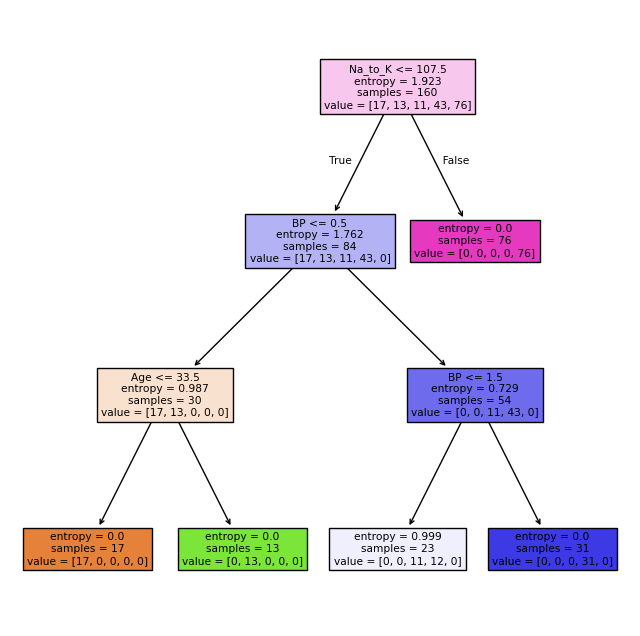

In [83]:
plt.figure(figsize=(8, 8))
tree.plot_tree(entropy_model, feature_names=X.columns, filled=True)
plt.show()

In [84]:
y_pred_entopy = entropy_model.predict(X_test)

In [85]:
print("Accuracy score : ", accuracy_score(y_pred_entopy, y_test))
print("Classification report : \n", classification_report(y_pred_entopy, y_test))

Accuracy score :  0.875
Classification report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         3
         2.0       0.00      0.00      0.00         0
         3.0       1.00      0.69      0.81        16
         4.0       1.00      1.00      1.00        15

    accuracy                           0.88        40
   macro avg       0.80      0.74      0.76        40
weighted avg       1.00      0.88      0.93        40



C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape